<a href="https://colab.research.google.com/github/Adityamewmew/Aditya-portofolio/blob/master/satgas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KLASIFIKASI TINGKAT KASUS PADA PPELAPORAN SATGAS PPKPT MENGGUNAKAN METODE NAIVE BAYES

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import io
from google.colab import files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

Inisialisasi sistem dan normalisasi

In [2]:
class SistemSatgas:
    def __init__(self):
        self.model = make_pipeline(CountVectorizer(), MultinomialNB())
        self.is_trained = False
        self.knowledge_base = None

    def normalisasi(self, text):
        if not isinstance(text, str): return set()
        clean = re.sub(r'[^\w\s]', '', text.lower())
        return set(clean.split())

print("Tahan 1 done")

Tahan 1 done


In [3]:
class SistemTraining(SistemSatgas):
    def train(self, df):
        self.knowledge_base = df
        self.model.fit(df['fitur_tindakan'], df['label_kelas'])
        self.is_trained = True

print("Tahap 2 done.")

Tahap 2 done.


In [4]:
class SistemSearching(SistemTraining):
    def cariAturan(self, kronologi):
        if self.knowledge_base is None: return None, 0

        kata_user = self.normalisasi(kronologi)
        skor_tertinggi = 0
        aturan_terpilih = None

        for aturan in self.knowledge_base['fitur_tindakan']:
            kata_aturan = self.normalisasi(aturan)
            skor = len(kata_user.intersection(kata_aturan))

            if skor > skor_tertinggi:
                skor_tertinggi = skor
                aturan_terpilih = aturan

        return aturan_terpilih, skor_tertinggi

print("Tahap 3 Done.")

Tahap 3 Done.


In [5]:
class SistemKlasifikasi(SistemSearching):
    def klasifikasi(self, tindakan):
        if not self.is_trained: return "Error", "0%"
        pred = self.model.predict([tindakan])[0]
        return pred

sistem = SistemKlasifikasi()

In [6]:
uploaded_train = files.upload()

Saving Dataset_Satgas..xlsx to Dataset_Satgas..xlsx


In [7]:
try:
    nama_file_train = next(iter(uploaded_train))
    df_train = pd.read_excel(io.BytesIO(uploaded_train[nama_file_train]))

    df_train = df_train.rename(columns={'Tindakan': 'fitur_tindakan', 'Tingkat Kasus': 'label_kelas'})

    sistem.train(df_train);

    print("\nAturan yang sudah di pelajari:")
    display(df_train.head(3))
except NameError:
    print("Belum upload file training")


Aturan yang sudah di pelajari:


,fitur_tindakan,label_kelas
0,Menyampaikan ujaran mendiskriminasi tampilan f...,Ringan
1,Menyampaikan ujaran melecehkan kondisi tubuh,Ringan
2,Memperlihatkan alat kelamin tanpa persetujuan,Ringan


In [8]:
uploaded_test = files.upload()

Saving DataKasus.xlsx to DataKasus.xlsx


In [9]:
try:
    nama_file_test = next(iter(uploaded_test))
    df_test = pd.read_excel(io.BytesIO(uploaded_test[nama_file_test]))

    df_test.columns = ['No', 'Tanggal', 'Kategori_Awal', 'Kronologi_Tindakan']

    hasil_analisis = []

    for idx, row in df_test.iterrows():
        prediksi = sistem.klasifikasi(row['Kronologi_Tindakan'])
        hasil_analisis.append({
            "Tanggal": row['Tanggal'],
            "Kronologi": row['Kronologi_Tindakan'],
            "Hasil Sistem": prediksi
        })

    df_hasil = pd.DataFrame(hasil_analisis)

    print("TABEL Analisis:")
    display(df_hasil)

except NameError:
    print("Kamu belum upload file testing")

TABEL Analisis:


,Tanggal,Kronologi,Hasil Sistem
0,15 Juli 2023,Menyampaikan ujaran mendiskriminasi tampilan f...,Ringan
1,18 Agustus 2023,Menyentuh mengusap meraba tubuh korban,Berat
2,15 November 2023,Mengirimkan gambar foto audio video porno,Sedang
3,7 Februari 2024,Memegang memeluk mencium tanpa izin,Berat
4,25 September 2024,Mengintip orang di ruang pribadi,Sedang
5,10 September 2024,Siulan atau catcalling bernuansa seksual,Ringan
6,15 Oktober 2024,Menyampaikan ujaran melecehkan kondisi tubuh,Ringan
7,22 April 2025,Membuka pakaian korban tanpa izin,Berat
8,27 Juni 2025,Melakukan perkosaan penetrasi benda tubuh,Berat
9,27 Juni 2025,Menatap korban dengan nuansa seksual,Ringan



   DEMO INPUT KASUS BARU
Masukkan Kronologi Kejadian: meraba tubuh dan mengurjarkan kata kata kasar
----------------------------------------
 Kronologi  : meraba tubuh dan mengurjarkan kata kata kasar
Aturan  : Menyentuh mengusap meraba tubuh korban
Tingkat Kasus : Berat
----------------------------------------

 (Analisis Probabilitas):


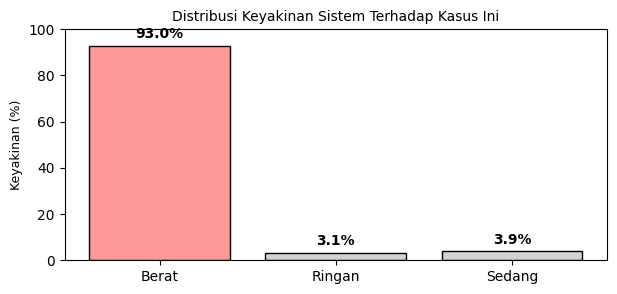

In [10]:
print("\n" + "="*40)
print("   DEMO INPUT KASUS BARU")
print("="*40)

kronologi = input("Masukkan Kronologi Kejadian: ")

tindakan, skor = sistem.cariAturan(kronologi)

teks_final = tindakan if tindakan else kronologi

if sistem.is_trained:
    probabilitas = sistem.model.predict_proba([teks_final])[0]
    kelas = sistem.model.classes_

    hasil_prediksi = sistem.model.predict([teks_final])[0]

    print("-" * 40)
    print(f" Kronologi  : {kronologi}")
    if tindakan:
        print(f"Aturan  : {tindakan}")


    print(f"Tingkat Kasus : {hasil_prediksi}")
    print("-" * 40)

    print("\n (Analisis Probabilitas):")

    df_prob = pd.DataFrame({'Kategori': kelas, 'Keyakinan': probabilitas * 100})

    plt.figure(figsize=(7, 3))
    colors = ['#ff9999' if x == hasil_prediksi else '#d3d3d3' for x in kelas] # Warna merah khusus yg terpilih
    bars = plt.bar(kelas, probabilitas * 100, color=colors, edgecolor='black')

    plt.title(f'Distribusi Keyakinan Sistem Terhadap Kasus Ini', fontsize=10)
    plt.ylabel('Keyakinan (%)', fontsize=9)
    plt.ylim(0, 100) # Batas 0 sampai 100%

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 2,
                 f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.show()

else:
    print("Sistem belum melakukan data Training")